In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [4]:
df = pd.read_csv("D:\Dataset\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

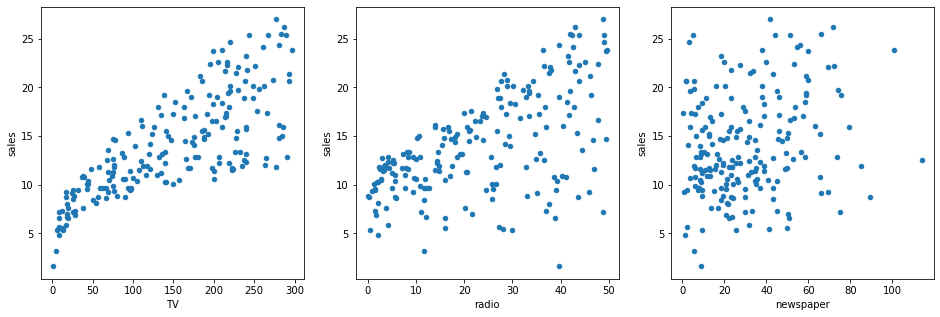

In [12]:
fig, axs = plt.subplots(1,3)

df.plot(kind = 'scatter' , x = 'TV' , y = 'sales' , ax = axs[0], figsize = (16,5))
df.plot(kind = 'scatter', x = 'radio' , y = 'sales' , ax = axs[1])
df.plot(kind = 'scatter' , x = 'newspaper' , y = 'sales' , ax = axs[2])

In [53]:
x = df[['newspaper']]
y = df.sales

In [54]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [55]:
print(lr.intercept_)
print(lr.coef_)

12.351407069278162
[0.0546931]


In [56]:
x_new = pd.DataFrame({'newspaper' : [50]})
x_new

,newspaper
0,50


In [57]:
lr.predict(x_new)

array([15.08606199])

In [58]:
x_new = pd.DataFrame({'TV' : [df.newspaper.min() , df.newspaper.max()]})
x_new

,TV
0,0.3
1,114.0


In [59]:
pre = lr.predict(x_new)

In [60]:
pre

array([12.367815 , 18.5864203])

df.plot(kind = 'scatter' , x = 'newspaper' , y = 'sales')
plt.plot(x_new,pre, c= 'red' , linewidth = 2)

In [33]:
x = df[['TV','radio','newspaper']]
y = df.sales

In [35]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [40]:
print('Intercept :', lr.intercept_)
print('TV :', lr.coef_[0])
print('radio :', lr.coef_[1])
print('newspaper :', lr.coef_[2])

Intercept : 2.9388893694594085
TV : 0.04576464545539759
radio : 0.1885300169182046
newspaper : -0.0010374930424762452


In [50]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
lm.conf_int()
lm.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002DC5FA0CF40>>

In [51]:
l1 = smf.ols(formula = 'sales ~ TV + radio', data = df).fit()
lm.rsquared

0.8972106381789522

In [52]:
l2 = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
lm.rsquared

0.8972106381789522

In [5]:
df = pd.DataFrame({'x' : [1,0,1,1], 'y' : [1,0,0,1], 'label' : ['A','A','B','B']})
df

,x,y,label
0,1,1,A
1,0,0,A
2,1,0,B
3,1,1,B
